<a href="https://colab.research.google.com/github/RoshanV1701/NaiveBayesAlgorithm/blob/main/NaiveBayesAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from google.colab import drive
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
from bs4 import BeautifulSoup
from sklearn.metrics import accuracy_score
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train = pd.read_csv("imdb_review_train.tsv", delimiter="\t")
test = pd.read_csv("imdb_review_test.tsv", delimiter="\t")

In [ ]:
train.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


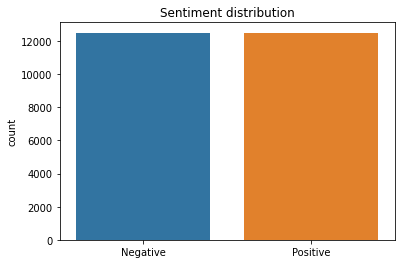

In [ ]:
f = sns.countplot(x='sentiment', data=train)
f.set_title("Sentiment distribution")
f.set_xticklabels(['Negative', 'Positive'])
plt.xlabel("");

In [ ]:
text = " ".join(review for review in train.review)

In [ ]:
class Tokenizer:
  
  def clean(self, text):
      no_html = BeautifulSoup(text).get_text()
      clean = re.sub("[^a-z\s]+", " ", no_html, flags=re.IGNORECASE)
      return re.sub("(\s+)", " ", clean)

 
  def tokenize(self, text):
      clean = self.clean(text).lower()
      stopwords_en = stopwords.words("english")
      return [w for w in re.split("\W+", clean) if not w in stopwords_en]

In [ ]:

class NaiveBayes:
    def __init__(self, classes, tokenizer):
      self.tokenizer = tokenizer
      self.classes = classes
      
    def group_by_class(self, X, y):
      data = dict()
      for c in self.classes:
        data[c] = X[np.where(y == c)]
      return data
           
    def fit(self, X, y):
        self.n_class_items = {}
        self.log_class_priors = {}
        self.word_counts = {}
        self.vocab = set()

        n = len(X)
        
        grouped_data = self.group_by_class(X, y)
        
        for c, data in grouped_data.items():
          self.n_class_items[c] = len(data)
          self.log_class_priors[c] = math.log(self.n_class_items[c] / n)
          self.word_counts[c] = defaultdict(lambda: 0)
          
          for text in data:
            counts = Counter(self.tokenizer.tokenize(text))
            for word, count in counts.items():
                if word not in self.vocab:
                    self.vocab.add(word)

                self.word_counts[c][word] += count
                
        return self
      
    def laplace_smoothing(self, word, text_class):
      num = self.word_counts[text_class][word] + 1
      denom = self.n_class_items[text_class] + len(self.vocab)
      return math.log(num / denom)
      
    def predict(self, X):
        result = []
        for text in X:
          
          class_scores = {c: self.log_class_priors[c] for c in self.classes}

          words = set(self.tokenizer.tokenize(text))
          for word in words:
              if word not in self.vocab: continue

              for c in self.classes:
                
                log_w_given_c = self.laplace_smoothing(word, c)
                class_scores[c] += log_w_given_c
                
          result.append(max(class_scores, key=class_scores.get))

        return result

In [ ]:
def fit(self, X, y):
    self.n_class_items = {}
    self.log_class_priors = {}
    self.word_counts = {}
    self.vocab = set()

    n = len(X)
    grouped_data = self.group_by_class(X, y)
    
    for c, data in grouped_data.items():
      self.n_class_items[c] = len(data)
      self.log_class_priors[c] = math.log(self.n_class_items[c] / n)
      self.word_counts[c] = defaultdict(lambda: 0)

      for text in data:
        counts = Counter(self.tokenizer.tokenize(text))
        for word, count in counts.items():
            if word not in self.vocab:
                self.vocab.add(word)

            self.word_counts[c][word] += count
  

In [ ]:
NB = NaiveBayes(
    classes=np.unique(y), 
    tokenizer=Tokenizer()
).fit(X_train, y_train)

In [ ]:
polarity = NB.predict(["Very good performance"])
if polarity==[0]:
  print("Negative")
else:
  print("Positive")

Positive


In [ ]:
polarity = NB.predict(["I fell sick as I could not eat medicine"])
if polarity==[0]:
  print("Negative")
else:
  print("Positive")

Negative


In [ ]:
polarity = NB.predict(["I was playing for a long time"])
if polarity==[0]:
  print("Negative")
else:
  print("Positive")

Positive


In [ ]:
polarity = NB.predict(["My leg is paining as "])
if polarity==[0]:
  print("Negative")
else:
  print("Positive")

Positive
